In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
mushrooms = pd.read_csv('/content/drive/MyDrive/3학년1학기/명예학회/Mushroom/mushrooms.csv')
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
mushrooms.shape

(8124, 23)

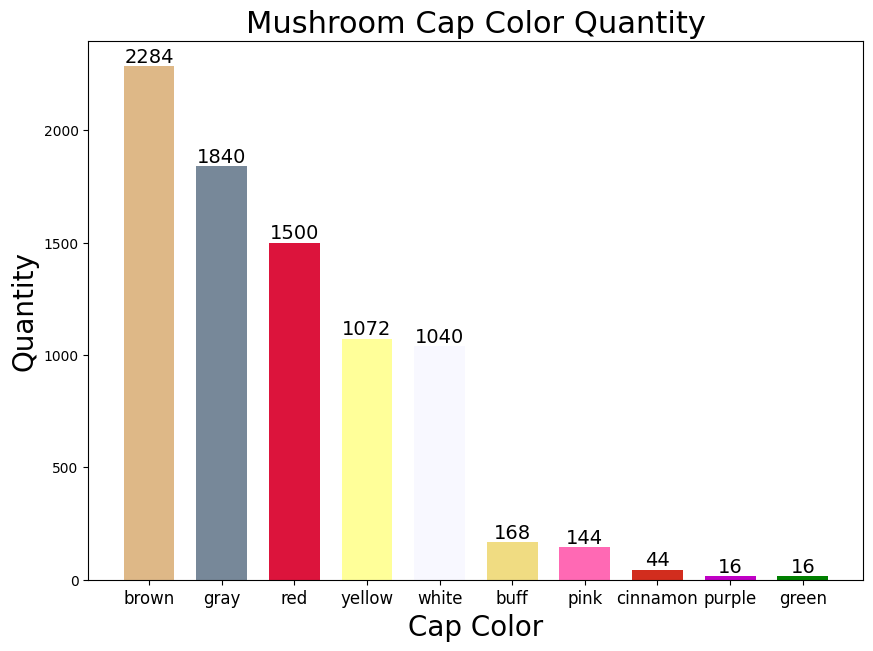

In [6]:
cap_colors = mushrooms['cap-color'].value_counts()
m_height = cap_colors.values.tolist()
cap_colors.axes
cap_color_labels = cap_colors.axes[0].tolist()

ind = np.arange(10)
width = 0.7
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Cap Color Quantity',fontsize=22)
ax.set_xticks(ind)
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),fontsize = 12)

def autolabel(rects,fontsize=14):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height), ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)        
plt.show()

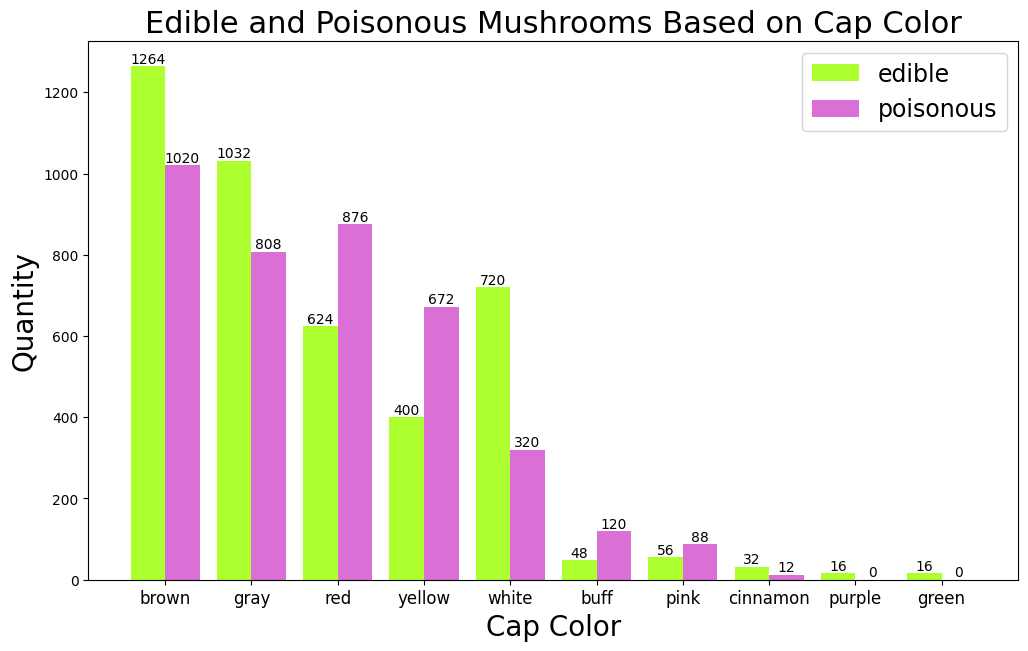

[1264, 1032, 624, 400, 720, 48, 56, 32, 16, 16]
[1020, 808, 876, 672, 320, 120, 88, 12, 0, 0]


In [7]:
poisonous_cc = []
edible_cc = []
for capColor in cap_color_labels:
    size = len(mushrooms[mushrooms['cap-color'] == capColor].index)
    edibles = len(mushrooms[(mushrooms['cap-color'] == capColor) & (mushrooms['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                    
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#DA70D6')

ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars,10)
autolabel(poison_bars,10)
plt.show()
print(edible_cc)
print(poisonous_cc)

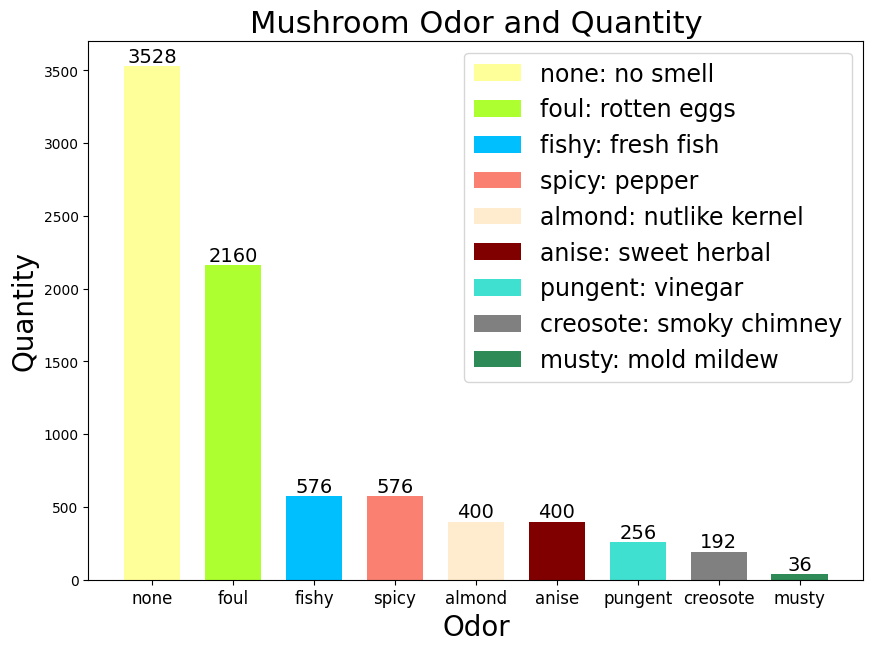

In [8]:
odors = mushrooms['odor'].value_counts()
odor_height = odors.values.tolist()
odor_labels = odors.axes[0].tolist()

width = 0.7 
ind = np.arange(9)
colors = ['#FFFF99','#ADFF2F','#00BFFF','#FA8072','#FFEBCD','#800000','#40E0D0','#808080','#2E8B57']

fig, ax = plt.subplots(figsize=(10,7))
odor_bars = ax.bar(ind, odor_height , width, color=colors)

ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Odor and Quantity',fontsize=22)
ax.set_xticks(ind)
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),fontsize = 12)
ax.legend(odor_bars, ['none: no smell','foul: rotten eggs', 'fishy: fresh fish','spicy: pepper','almond: nutlike kernel',
                      'anise: sweet herbal', 'pungent: vinegar', 'creosote: smoky chimney', 'musty: mold mildew'],fontsize=17)
autolabel(odor_bars)        
plt.show()

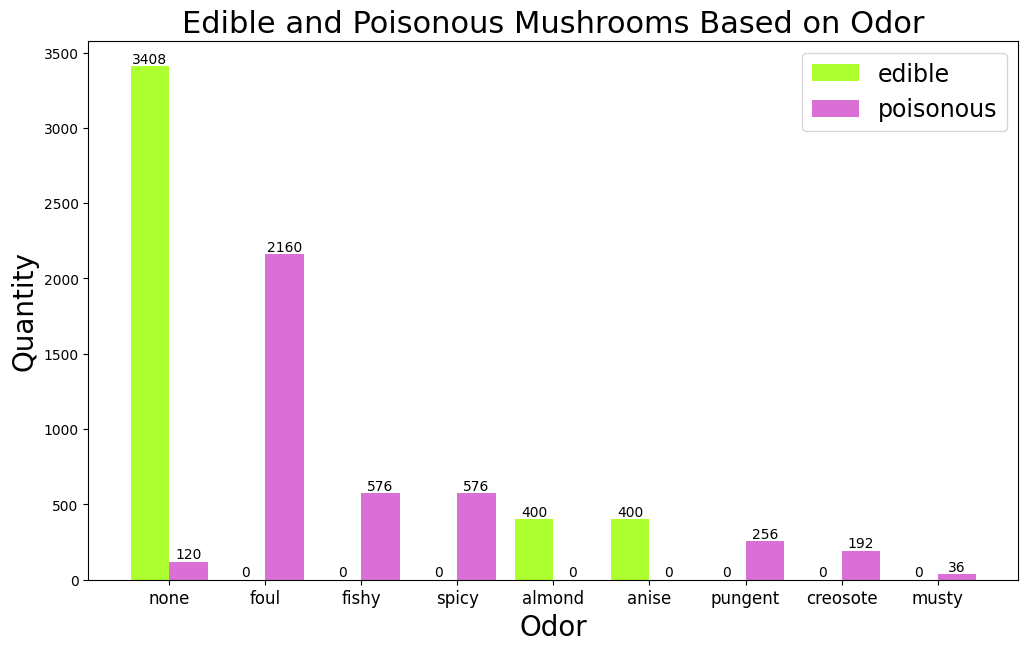

[3408, 0, 0, 0, 400, 400, 0, 0, 0]
[120, 2160, 576, 576, 0, 0, 256, 192, 36]


In [9]:
poisonous_od = []
edible_od = []
for odor in odor_labels:
    size = len(mushrooms[mushrooms['odor'] == odor].index)
    edibles = len(mushrooms[(mushrooms['odor'] == odor) & (mushrooms['class'] == 'e')].index)
    edible_od.append(edibles)
    poisonous_od.append(size-edibles)
                        
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_od , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_od , width, color='#DA70D6')

ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Odor',fontsize=22)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible_od)
print(poisonous_od)

[4040, 1712, 1248, 400, 384, 340]


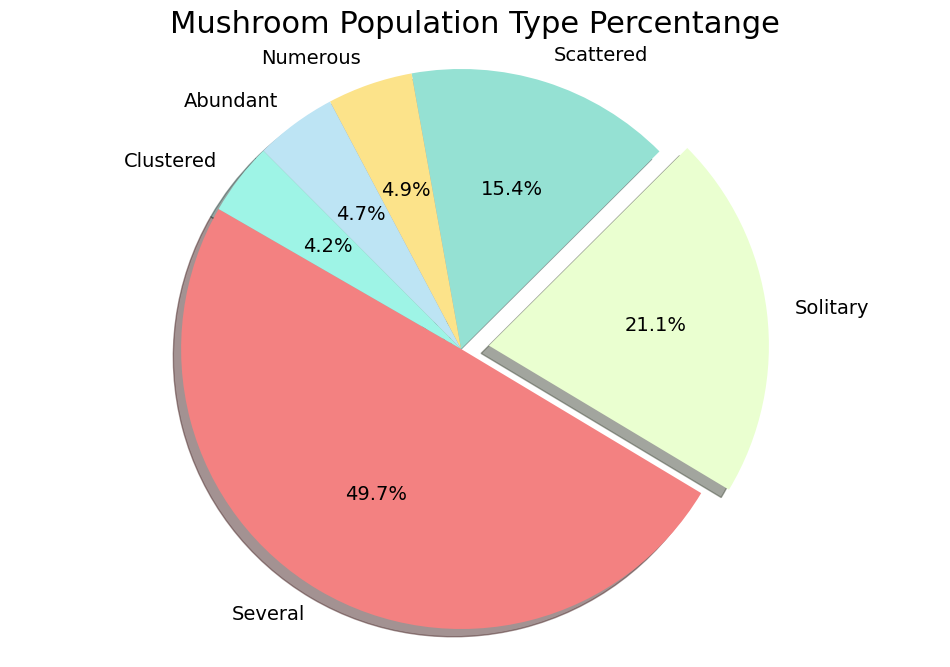

In [10]:
populations = mushrooms['population'].value_counts()
pop_size = populations.values.tolist()
pop_types = populations.axes[0].tolist()
print(pop_size)

pop_labels = 'Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'
colors = ['#F38181','#EAFFD0','#95E1D3','#FCE38A','#BDE4F4','#9EF4E6']
explode = (0, 0.1, 0, 0, 0, 0)
fig = plt.figure(figsize=(12,8))
plt.title('Mushroom Population Type Percentange',fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)
    
plt.axis('equal')
plt.show()

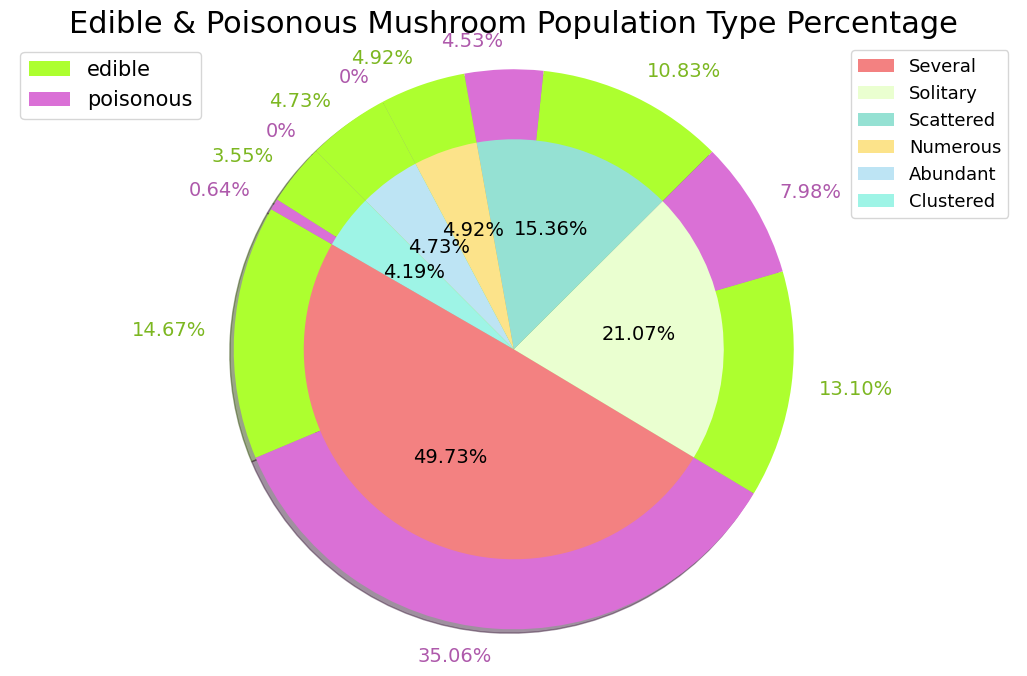

In [11]:
poisonous_pop = []
edible_pop = []
for pop in pop_types: 
    size = len(mushrooms[mushrooms['population'] == pop].index)
    edibles = len(mushrooms[(mushrooms['population'] == pop) & (mushrooms['class'] == 'e')].index)
    edible_pop.append(edibles)
    poisonous_pop.append(size-edibles)
combine_ed_poi = []

for i in range(0,len(edible_pop)):
    combine_ed_poi.append(edible_pop[i])
    combine_ed_poi.append(poisonous_pop[i])

fig = plt.subplots(figsize=(13,8))
plt.title('Edible & Poisonous Mushroom Population Type Percentage',fontsize=22)
percentages_e_p = ['14.67%','35.06%','13.10%', '7.98%','10.83%','4.53%','4.92%','0%','4.73%','0%', '3.55%','0.64%']

patches1, texts1 = plt.pie(combine_ed_poi,radius = 2, labels= percentages_e_p, colors=['#ADFF2F','#DA70D6'], shadow=True, startangle=150)
for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#7CB721')
    else:
        texts1[i].set_color('#AE59AB')
    texts1[i].set_fontsize(14)

patches2, texts2, autotexts2 = plt.pie(pop_size, colors=colors, radius = 1.5, autopct='%1.2f%%', shadow=True, startangle=150,labeldistance= 2.2)
for aut in autotexts2:
    aut.set_fontsize(14)
    aut.set_horizontalalignment('center') 

first_legend   = plt.legend(patches1, ['edible','poisonous'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, pop_labels, loc="best",fontsize=13)
plt.gca().add_artist(first_legend)
plt.axis('equal')
plt.show()

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64


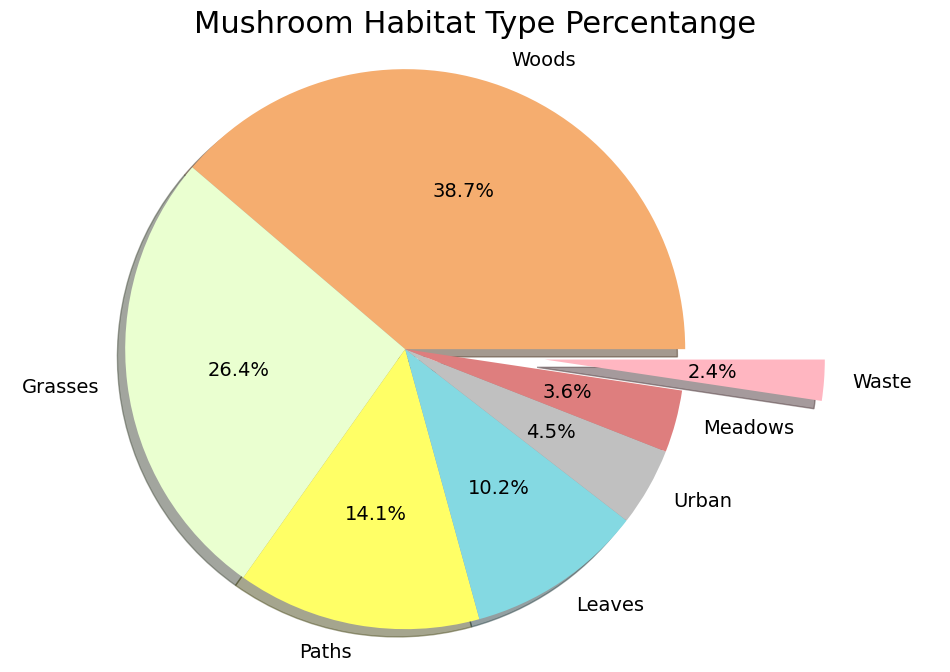

In [12]:
habitats = mushrooms['habitat'].value_counts()
hab_size = habitats.values.tolist()
hab_types = habitats.axes[0].tolist()
print(habitats)

hab_labels = 'Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'
colors = ['#F5AD6F','#EAFFD0','#FFFF66','#84D9E2','#C0C0C0','#DE7E7E', '#FFB6C1']
explode = (0, 0, 0, 0, 0, 0,0.5)
fig = plt.figure(figsize=(12,8))
plt.title('Mushroom Habitat Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(hab_size, explode=explode, labels=hab_labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=360)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

[1880, 1408, 136, 240, 96, 256, 192]
[1268, 740, 1008, 592, 272, 36, 0]
[1880, 1268, 1408, 740, 136, 1008, 240, 592, 96, 272, 256, 36, 192, 0]


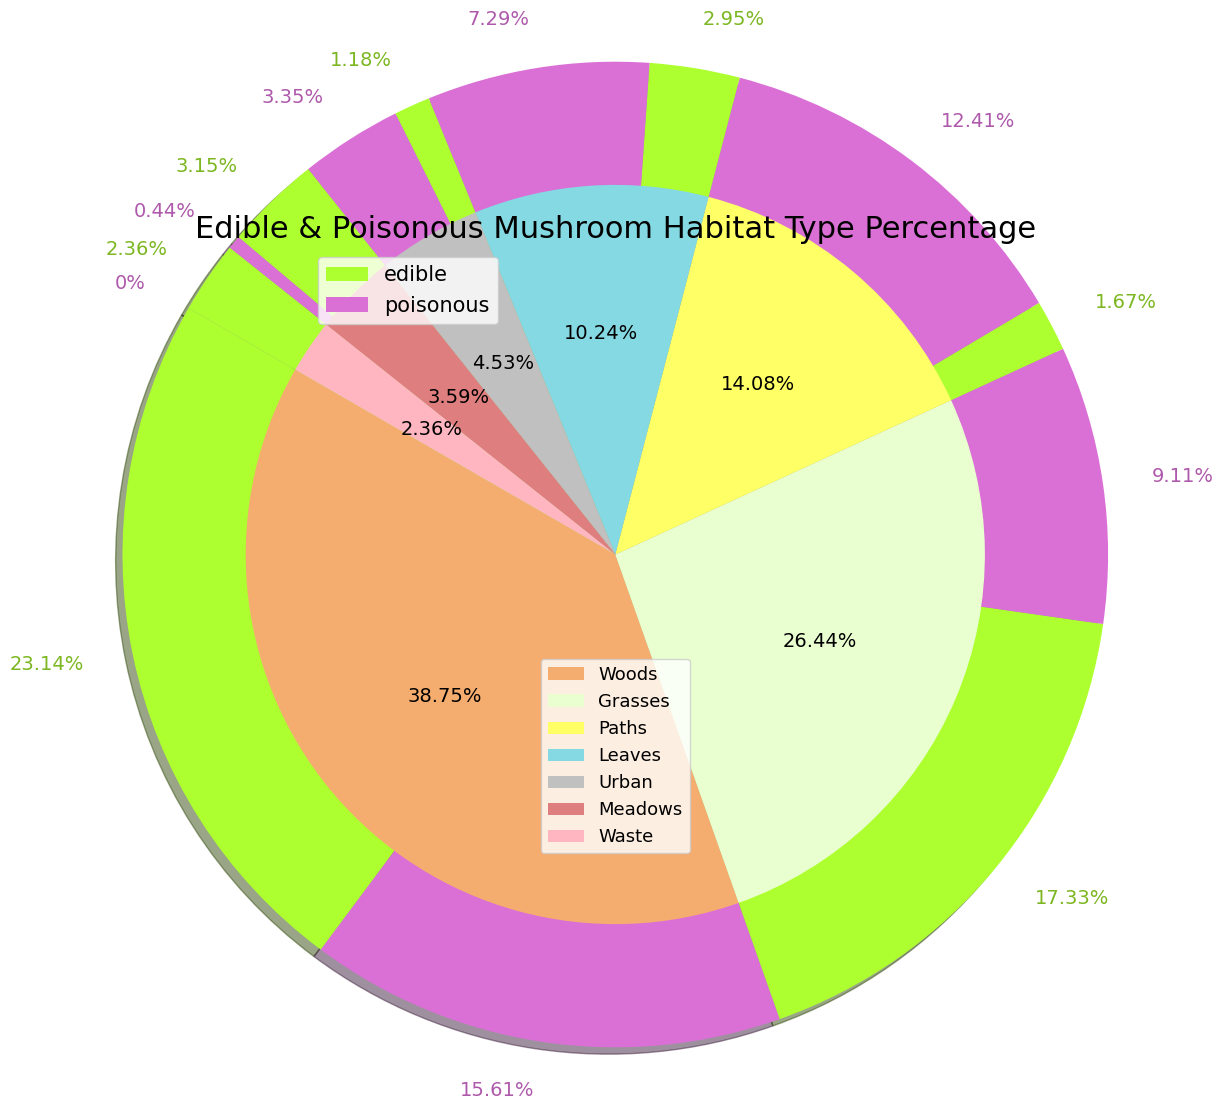

In [13]:
poisonous_hab = []
edible_hab = []

for hab in hab_types: 
    size = len(mushrooms[mushrooms['habitat'] == hab].index)
    edibles = len(mushrooms[(mushrooms['habitat'] == hab) & (mushrooms['class'] == 'e')].index)
    edible_hab.append(edibles)
    poisonous_hab.append(size-edibles)
combine_ed_poi = []

for i in range(0,len(edible_hab)):
    combine_ed_poi.append(edible_hab[i])
    combine_ed_poi.append(poisonous_hab[i])
print(edible_hab) 
print(poisonous_hab) 
print(combine_ed_poi)

fig = plt.subplots(figsize=(13,8))
plt.title('Edible & Poisonous Mushroom Habitat Type Percentage', fontsize=22)
percentages_e_p = ['23.14%','15.61%','17.33%', '9.11%','1.67%','12.41%','2.95%','7.29%','1.18%','3.35%', '3.15%','0.44%','2.36%','0%']

patches1, texts1= plt.pie(combine_ed_poi,radius = 2, labels=percentages_e_p, colors=['#ADFF2F','#DA70D6'], shadow=True, startangle=150)
for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#7CB721')
    else:
        texts1[i].set_color('#AE59AB')
    texts1[i].set_fontsize(14)         

patches2, texts2, autotexts2 = plt.pie(hab_size, colors=colors, radius = 1.5, autopct='%1.2f%%', shadow=True, startangle=150,labeldistance= 2.2)
for aut in autotexts2:
    aut.set_fontsize(14)
    aut.set_horizontalalignment('center')

first_legend   = plt.legend(patches1, ['edible','poisonous'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, hab_labels, loc="best",fontsize=13)
plt.gca().add_artist(first_legend)
plt.show()

In [14]:
mushrooms_sample = mushrooms.loc[np.random.choice(mushrooms.index, 1000, False)]

In [15]:
mushrooms_sample['cap-color'].unique()

array(['g', 'e', 'b', 'w', 'n', 'y', 'c', 'p', 'r', 'u'], dtype=object)

In [16]:
capColors = mushrooms_sample['cap-color']
capColors.value_counts()

n    272
g    214
e    204
w    142
y    111
b     30
p     18
c      4
r      3
u      2
Name: cap-color, dtype: int64